In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

trainData = pd.read_csv("train.csv")
trainData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
x = trainData.drop('label', axis = 1)
y = trainData['label']
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

trainY = []
for i in range(len(y)):
    trainY.append([0,0,0,0,0,0,0,0,0,0])
    trainY[-1][y[i]] = 1
    
y = trainY
y = tf.convert_to_tensor(y)
y

<tf.Tensor: shape=(42000, 10), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])>

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='sigmoid'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
max_epoch = 100
epoch = 0

acc_history=[]
loss_history=[]

while epoch < max_epoch:
    epoch += 1
    print(f"Epoch :{epoch}/{max_epoch}")
    quality = model.fit(x, y, epochs=1)
    acc_history += quality.history['accuracy']
    loss_history+= quality.history['loss']

Epoch :1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0925 - accuracy: 0.2968
Epoch :2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.5150
Epoch :3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.6317
Epoch :4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.7027
Epoch :5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0469 - accuracy: 0.7525
Epoch :6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0409 - accuracy: 0.7957
Epoch :7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.8259
Epoch :8/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0325 - accuracy: 0.8473
Epoch :9/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.8621
Epoch :10/100
1313/1313 [==============================] - 3s 2m

1313/1313 [==============================] - 2s 2ms/step - loss: 0.0071 - accuracy: 0.9594
Epoch :80/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0071 - accuracy: 0.9597
Epoch :81/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9598
Epoch :82/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0070 - accuracy: 0.9601
Epoch :83/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0070 - accuracy: 0.9604
Epoch :84/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 0.9606
Epoch :85/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 0.9606
Epoch :86/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0069 - accuracy: 0.9610
Epoch :87/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0068 - accuracy: 0.9611
Epoch :88/100
1313/1313 [==============================] - 3s 2ms/ste

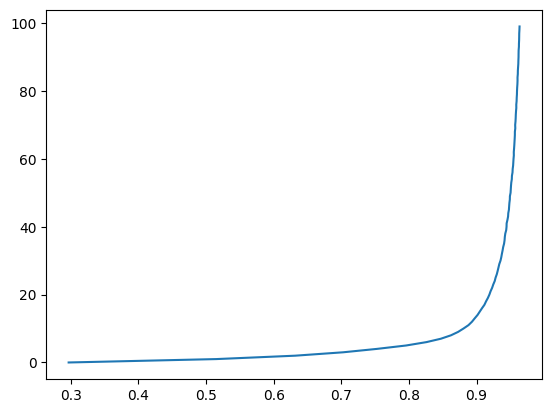

In [4]:
epochs_range = range(epoch)
plt.subplot(1, 1, 1)
plt.plot(acc_history, epochs_range)

In [5]:
predictions = model.predict([x])

1313/1313 [==============================] - 2s 1ms/step


In [6]:
def ShowImage(index):
    a=trainData.iloc[index,1:].values
    a=a.reshape(28,28).astype('uint8')
    predicted = np.argmax(predictions[index])
    im = plt.imshow(a,cmap='gray')
    plt.title(f"Actual number {trainData.label[index]}, predicted: {predicted}")
    plt.show(im)

In [7]:
totalNums = len(trainData)
guessedCorrect = 0
guessedWrong = 0
listofWrong = []
for i in range(totalNums):
    predicted = np.argmax(predictions[i])
    if(predicted == trainData.label[i]):
        guessedCorrect += 1
    else:
        listofWrong.append(i)
accuracy = guessedCorrect/totalNums
error = 1-accuracy
print(f"correct guess ratio: {accuracy}\nerror ratio: {error}")

correct guess ratio: 0.9638095238095238
error ratio: 0.03619047619047622


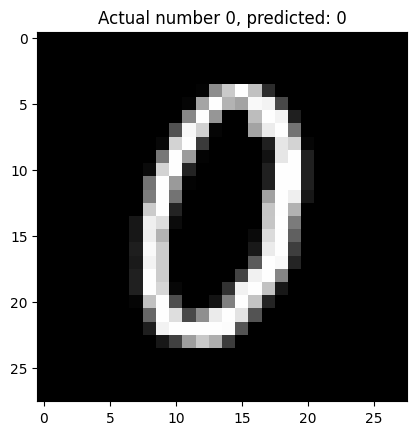

In [8]:
ShowImage(5)

In [9]:
#for j in range(len(listofWrong)):
#    ShowImage(listofWrong[j])